In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,discriminant_analysis,cross_validation

In [10]:
# 加载数据方法，这里使用scikit-learn自带的鸢尾花分类数据
def load_data():
    iris = datasets.load_iris()
    # stratify参数将按照分类比例进行拆分数据
    return cross_validation.train_test_split(iris.data, iris.target,test_size=0.25,random_state=0,stratify=iris.target)

In [11]:
# 逻辑回归模型
def test_LogisticRegression(*data):
    train_x,test_x, train_y, test_y = data
    regr = linear_model.LogisticRegression()
    regr.fit(train_x, train_y)
    
    # y=wx+b  分别显示权重及b值
    print('【权重】coefficient:{0}'.format(regr.coef_))
    print('【b值】intercept: {0}'.format(regr.intercept_))
    # 均方差
    print('【均方差】residual sum of squares:{0}'.format(np.mean((regr.predict(test_x) -test_y)**2)))
    # 成绩
    print('【成绩】Testing Score: {0}'.format(regr.score(test_x,test_y)))

In [12]:
# 测试
train_x,test_x, train_y, test_y = load_data()
test_LogisticRegression(train_x, test_x, train_y, test_y)

【权重】coefficient:[[ 0.39310895  1.35470406 -2.12308303 -0.96477916]
 [ 0.22462128 -1.34888898  0.60067997 -1.24122398]
 [-1.50918214 -1.29436177  2.14150484  2.2961458 ]]
【b值】intercept: [ 0.24122458  1.13775782 -1.09418724]
【均方差】residual sum of squares:0.02631578947368421
【成绩】Testing Score: 0.9736842105263158


In [13]:
# 逻辑回归模型 multinomial 多类分类策略
def test_LogisticRegression_multinomial(*data):
    train_x,test_x, train_y, test_y = data
    regr = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
    regr.fit(train_x, train_y)
    
    # y=wx+b  分别显示权重及b值
    print('【权重】coefficient:{0}'.format(regr.coef_))
    print('【b值】intercept: {0}'.format(regr.intercept_))
    # 均方差
    print('【均方差】residual sum of squares:{0}'.format(np.mean((regr.predict(test_x) -test_y)**2)))
    # 成绩
    print('【成绩】Testing Score: {0}'.format(regr.score(test_x,test_y)))

In [15]:
# 测试
train_x,test_x, train_y, test_y = load_data()
test_LogisticRegression_multinomial(train_x, test_x, train_y, test_y)

【权重】coefficient:[[-0.38413369  0.85418523 -2.27223622 -0.98531286]
 [ 0.34404755 -0.37365092 -0.03070324 -0.86072926]
 [ 0.04008614 -0.48053431  2.30293946  1.84604212]]
【b值】intercept: [  8.80503216   2.46636227 -11.27139443]
【均方差】residual sum of squares:0.0
【成绩】Testing Score: 1.0


In [22]:
# 逻辑回归模型 参数C对结果的影响
def test_LogisticRegression_C(*data):
    train_x,test_x, train_y, test_y = data
    Cs = np.logspace(-2,4,num=100)
    test_score = []
    for C in Cs:
#         regr = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs',C=C)?
        regr = linear_model.LogisticRegression(C=C)
        regr.fit(train_x,train_y)
        test_score.append(regr.score(test_x,test_y))
        
    # 绘图：
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(Cs,test_score, label='Testing Score')
    ax.set_xlabel(r'C')
    ax.set_ylabel(r'score')
    ax.set_title('LogisticRegression')
    ax.set_xscale('log')
    plt.show()

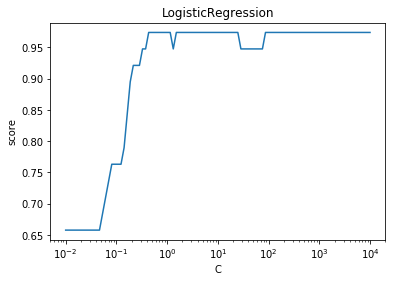

In [23]:
# 进行测试
train_x,test_x, train_y, test_y = load_data()
test_LogisticRegression_C(train_x, test_x, train_y, test_y)